In [1]:
import sys
sys.path.append('../src')

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import tensorflow as tf

In [3]:
from gait.config import pd
from gait.utils import get_data_by_overlap_percent, split_test_train_by_subjects
from gait.training import train_model, timeseries_shapes
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions

In [4]:
OVERLAP_PERCENT = 30
X, y, subjects = get_data_by_overlap_percent(OVERLAP_PERCENT)
y = np.array(y, dtype="str")
subjects = np.array(subjects, dtype="str")
y_nan_indexes = np.where(y == 'nan')
X = np.delete(X, y_nan_indexes[0], axis=0)
y = np.delete(y, y_nan_indexes[0], axis=0)
subjects = np.delete(subjects, y_nan_indexes[0], axis=0)
exclude_subjects = ['ddAeJA42PXvwthbW'];

indexes = np.where(subjects == exclude_subjects)

X = np.delete(X, indexes[0], axis=0)
y = np.delete(y, indexes[0], axis=0)
subjects = np.delete(subjects, indexes[0], axis=0)
print(X.shape)

print(X.shape)
print(y.shape)
print(subjects.shape)
print(subjects[0])

(15000, 128, 9)
(15000, 128, 9)
(15000, 1)
(15000, 1)
['NKdnm6cN3KKAx7R4']


In [5]:
print(np.where(y == 'nan'))
print(np.where(subjects == 'nan'))
print(np.where(subjects == 'nan'))
print(np.unique(subjects))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
['EUbKPOSQgjccjtvi' 'MMuX9YIh4NTbLZLM' 'NKdnm6cN3KKAx7R4'
 'PE8D53oX060qLbdX' 'psiuhPJmLIa2wC4u' 'xYdtS1F8tDyjEIgN']


In [6]:
X_train, X_test, y_train, y_test, y_train_non_encoded, y_test_non_encoded = split_test_train_by_subjects(
    X, y, subjects, train_percent=0.9)
variant = 'cnn'
if(variant == 'cnn_lstm'):
    n_steps, n_length = 4, 32
    n_timesteps, n_features, n_outputs = timeseries_shapes(X_train, y_train)

    X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
    X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))
    
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


UNIQUE>>>>>>> ['MMuX9YIh4NTbLZLM', 'EUbKPOSQgjccjtvi', 'psiuhPJmLIa2wC4u', 'xYdtS1F8tDyjEIgN', 'PE8D53oX060qLbdX', 'NKdnm6cN3KKAx7R4']
(14382, 128, 9)
(14382, 6)
(618, 128, 9)
(618, 6)


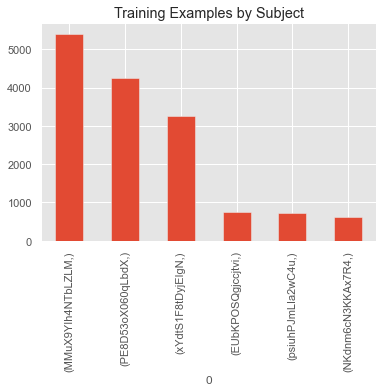

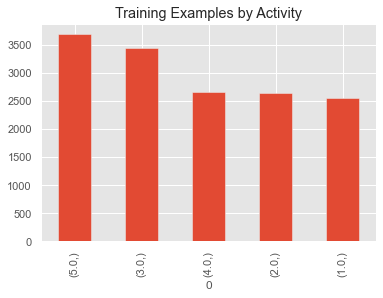

In [7]:
sns.set();
plt.style.use('ggplot')

subject_df = pd.DataFrame(subjects)
subject_df.value_counts().plot(kind='bar',
                                   title='Training Examples by Subject')
plt.show()
activity_df = pd.DataFrame(y)
activity_df.value_counts().plot(kind="bar", title="Training Examples by Activity")
plt.show();

In [8]:
# tf.debugging.set_log_device_placement(True)
gpus = tf.config.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)
with strategy.scope():
    model, history, evaluation_history = train_model(X_train, y_train, X_test, y_test, overlap_percent=OVERLAP_PERCENT, batch_size=4, epochs=200, variant=variant)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assi

In [ ]:
save_history(history, OVERLAP_PERCENT)
save_test_history(evaluation_history, OVERLAP_PERCENT)

In [ ]:
save_accuracy_loss_figure(history, OVERLAP_PERCENT)
validations, predictions = compute_validations_predictions(
    model, X_test, y_test)
save_confusion_matrix_figure(validations, predictions, OVERLAP_PERCENT, sns)


In [ ]:
# from sklearn import metrics
# from sklearn.metrics import classification_report
# import numpy as np

In [ ]:
# plt.figure(figsize=(6, 4))
# plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
# plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
# plt.title('Model Accuracy and Loss')
# plt.ylabel('Accuracy and Loss')
# plt.xlabel('Training Epoch')
# plt.ylim(0)
# plt.legend()
# plt.show()

# # Print confusion matrix for training data
# y_pred_train = model.predict(X_train)
# # Take the class with the highest probability from the train predictions
# max_y_pred_train = np.argmax(y_pred_train, axis=1)
# print(max_y_pred_train.shape)
# print(y_train_non_encoded.shape)
# print(classification_report(y_train_non_encoded, max_y_pred_train))

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='magma_r',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# y_pred_test = model.predict(X_test)
# # Take the class with the highest probability from the test predictions
# max_y_pred_test = np.argmax(y_pred_test, axis=1)
# max_y_test = np.argmax(y_test, axis=1)

# show_confusion_matrix(max_y_test, max_y_pred_test)

# print(classification_report(max_y_test, max_y_pred_test))